In [27]:
!rm -r interrogador_v0

In [28]:
!git clone https://github.com/manueljerez7/interrogador_v0

Cloning into 'interrogador_v0'...
remote: Enumerating objects: 487, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 487 (delta 0), reused 2 (delta 0), pack-reused 481
Receiving objects: 100% (487/487), 369.08 MiB | 13.91 MiB/s, done.
Resolving deltas: 100% (128/128), done.
Updating files: 100% (229/229), done.


In [29]:
import zipfile
import os
import csv
import matplotlib.pyplot as plt
import numpy as np

In [30]:

# Ruta de la carpeta que contiene los archivos .zip
carpeta_zip = 'interrogador_v0/Exp2_FBG2/Estatico'

# Listas para almacenar los valores medios de cada tipo de archivo
valores_medios_temp = []

# Iterar a través de los archivos .zip en la carpeta
for archivo_zip in os.listdir(carpeta_zip):
    if archivo_zip.endswith('.zip'):
        nombre_sin_extension = os.path.splitext(archivo_zip)[0]
        subcarpeta_destino = os.path.join(carpeta_zip, nombre_sin_extension)

        # Crear la subcarpeta si no existe
        if not os.path.exists(subcarpeta_destino):
            os.makedirs(subcarpeta_destino)

        ruta_zip = os.path.join(carpeta_zip, archivo_zip)

        # Extraer los archivos del .zip en la subcarpeta
        with zipfile.ZipFile(ruta_zip, 'r') as zip_ref:
            zip_ref.extractall(subcarpeta_destino)

        # Iterar a través de los archivos extraídos en la subcarpeta
        for archivo_csv in os.listdir(subcarpeta_destino):
            if archivo_csv.endswith('_loc.csv') or archivo_csv.endswith('_temp.csv'):
                ruta_csv = os.path.join(subcarpeta_destino, archivo_csv)

                # Calcular el valor medio de cada columna
                with open(ruta_csv, 'r') as csv_file:
                    reader = csv.reader(csv_file)
                    columnas = list(zip(*reader))
                    primera_columna = columnas[len(columnas)-1]

                    # Asegurarse de que haya al menos un valor en la columna
                    if primera_columna and all(float(valor) > 0 for valor in primera_columna):
                        valor_medio = sum(map(float, primera_columna)) / len(primera_columna)

                        if archivo_csv.endswith('_temp.csv'):
                            valores_medios_temp.append(valor_medio)

valores_medios_temp.sort()



In [31]:
temps_fbg = [round(e,1) for e in valores_medios_temp]
temps_fbg

[28.7,
 68.5,
 123.1,
 202.7,
 294.1,
 388.5,
 510.8,
 645.8,
 754.8,
 845.2,
 890.8,
 897.7]

In [32]:
temps_termopar_min = [26.7, 67.6, 123.4, 203.5, 294.3, 388.9, 510.9, 644.6, 753, 860, 942, 994.3]
temps_termopar_max = [28, 67.7, 123.6, 203.9, 294.7, 390, 513.2, 648.3, 759.7, 870.9, 956.4, 1014]
temps_termopar = [(a + b)/2 for a, b in zip(temps_termopar_min, temps_termopar_max)]
temps_termopar

[27.35,
 67.65,
 123.5,
 203.7,
 294.5,
 389.45,
 512.05,
 646.45,
 756.35,
 865.45,
 949.2,
 1004.15]

### Comparación de valores sólo para el intervalo de temperaturas calibrado [hasta 750ºC]


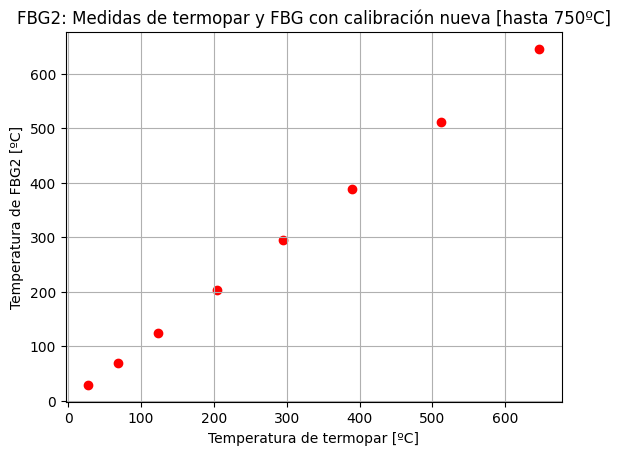

In [33]:
temps_fbg_filter = list(filter(lambda x: x < 750, valores_medios_temp))
temps_termopar_filter = list(filter(lambda x: x < 750, temps_termopar))

plt.scatter(temps_termopar_filter, temps_fbg_filter, label="Medidas de termopar vs FBG2",color='red')
plt.title('FBG2: Medidas de termopar y FBG con calibración nueva [hasta 750ºC]')
plt.xlabel('Temperatura de termopar [ºC]')
plt.ylabel('Temperatura de FBG2 [ºC]')
plt.grid(True)

plt.show()

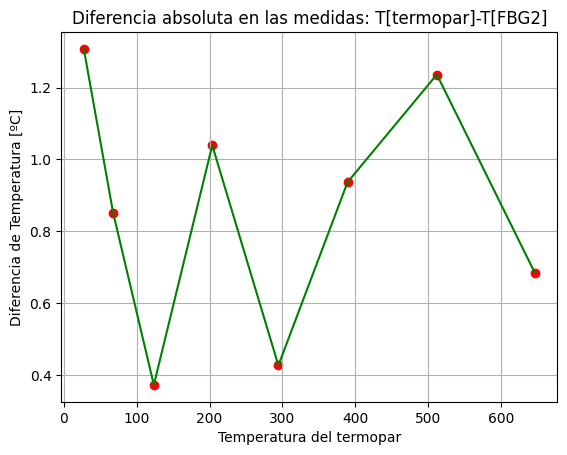

In [37]:
diferencia_temps_filter = [abs(a - b) for a, b in zip(temps_termopar_filter, temps_fbg_filter)]

plt.plot(temps_termopar_filter, diferencia_temps_filter,color='Green')
plt.scatter(temps_termopar_filter, diferencia_temps_filter,color='Red')


plt.grid(True)

plt.title('Diferencia absoluta en las medidas: T[termopar]-T[FBG2]')
plt.xlabel('Temperatura del termopar')
plt.ylabel('Diferencia de Temperatura [ºC]')
plt.show()

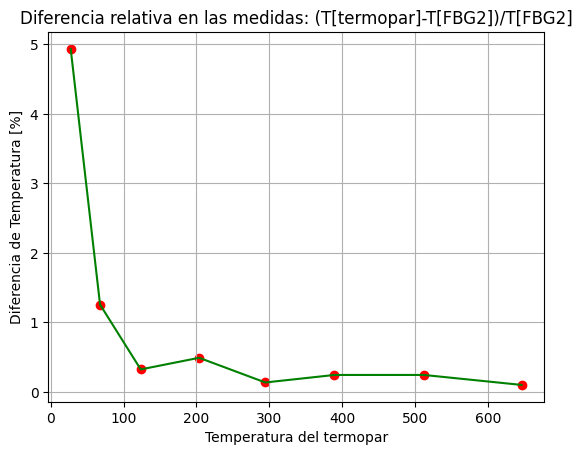

In [39]:
diferencia_rel_temps = [100*abs(a - b)/a for a, b in zip(temps_termopar_filter, temps_fbg)]

plt.plot(temps_termopar_filter, diferencia_rel_temps,color='Green')
plt.scatter(temps_termopar_filter, diferencia_rel_temps,color='Red')


plt.grid(True)

plt.title('Diferencia relativa en las medidas: (T[termopar]-T[FBG2])/T[FBG2] hasta 750ºC')
plt.xlabel('Temperatura del termopar')
plt.ylabel('Diferencia de Temperatura [%]')
plt.show()

### Comparación de valores completo [hasta 1000ºC]


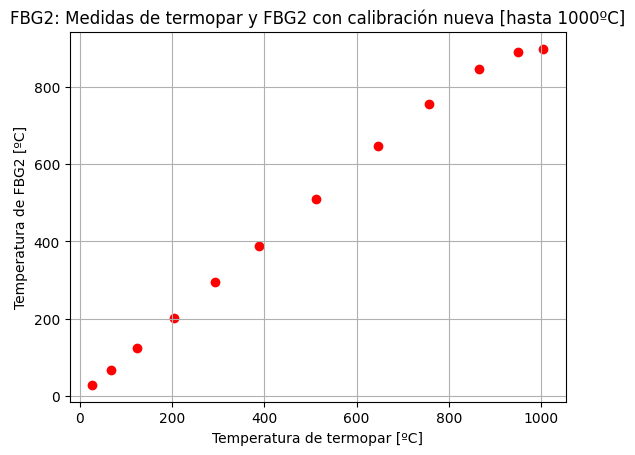

In [40]:

plt.scatter(temps_termopar, temps_fbg, label="Medidas de termopar vs FBG2",color='red')
plt.title('FBG2: Medidas de termopar y FBG2 con calibración nueva [hasta 1000ºC]')
plt.xlabel('Temperatura de termopar [ºC]')
plt.ylabel('Temperatura de FBG2 [ºC]')
plt.grid(True)

plt.show()

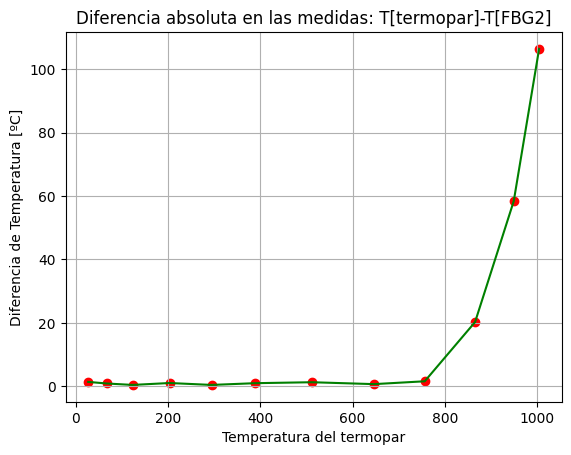

In [41]:
diferencia_temps = [abs(a - b) for a, b in zip(temps_termopar, temps_fbg)]

plt.plot(temps_termopar, diferencia_temps,color='Green')
plt.scatter(temps_termopar, diferencia_temps,color='Red')


plt.grid(True)

plt.title('Diferencia absoluta en las medidas: T[termopar]-T[FBG2] hasta 1000ºC')
plt.xlabel('Temperatura del termopar')
plt.ylabel('Diferencia de Temperatura [ºC]')
plt.show()

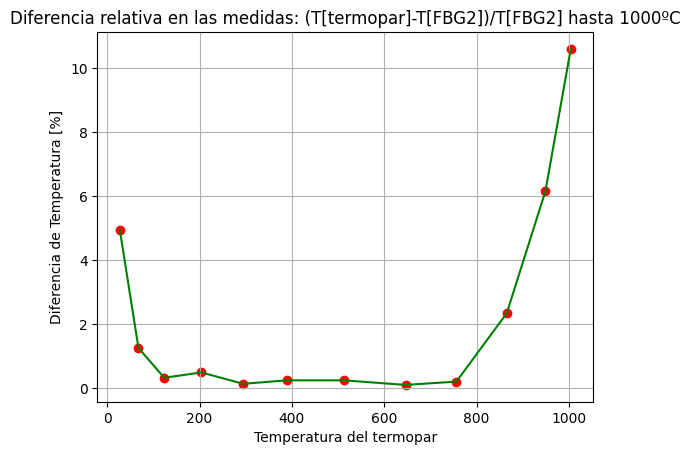

In [43]:
diferencia_rel = [100*abs(a - b)/a for a, b in zip(temps_termopar, temps_fbg)]

plt.plot(temps_termopar, diferencia_rel,color='Green')
plt.scatter(temps_termopar, diferencia_rel,color='Red')


plt.grid(True)

plt.title('Diferencia relativa en las medidas: (T[termopar]-T[FBG2])/T[FBG2] hasta 1000ºC')
plt.xlabel('Temperatura del termopar')
plt.ylabel('Diferencia de Temperatura [%]')
plt.show()